# 165 CW - Wine Identification - Joseph Parish - 2326446

<h1>Introduction</h1>

As a data scientist, I have been tasked with carrying out the full "data science" pipeline for an [1]incomplete dataset of wine attributes with 3 locations they were made at. I will explore whether I can create a model to reliably predict where among the 3 locations the wine was made : I will do this by creating a classification model due to trying to predicting the likelihood or probability that the data that follows will fall into a predetermined categorie, then applying it to the data and then analysing whether it is reliable or not using a confusion matrix. Then I will create a regression model due to the correlation found in the Exploritory analysis and perform an analysis on whether the model is reliable. Then I will explore the most reliable model and come to a conclusion.

<h1>Data Description and Exploratory Analysis</h1>

[1]The dataset are composed of the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivar. The analysis determined the quantities of the constituents found in each of the types of wines. The dataset is a set of data of variying attributes of 178 bottles of wine. The wine dataset is tabular with 13 attributes instead of the complete 30 (as supposedly the data on the 17 others was lost). These attributes are all quantitative and continuous.

The 13 attributes consist of:
* Target	
* Alcohol	
* Malic acid	
* Ash	
* Alcalinity of ash	
* Magnesium	
* Total phenols	
* Flavanoids	
* Nonflavanoid phenols	
* Proanthocyanins	
* Color intensity	
* Hue	
* OD280/OD315 of diluted wines	
* Proline

Instances of wine data for the 3 Target Locations:
* Location 1 - 59
* Location 2 - 71
* Location 3 - 48


In [385]:
# imports
import numpy as np
import pandas as pd
import matplotlib as mb
import seaborn as sns
# load dataset
DF = pd.read_csv(r"C:\Users\jp751\OneDrive\Documents\CS - 165\wine.data")
DF.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [386]:
import matplotlib.pyplot as plt
X = DF.drop('Target', axis = 1)
Y = DF['Target']
X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


I belive that due to the mean and median being so far apart on Malic acid and Proline that they will be major determining factors on predictions, for the rest they probably wont have as much impact on the result.

C:\Users\jp751\AppData\Local\Temp\ipykernel_24352\4151488683.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('rainbow', num_categories)


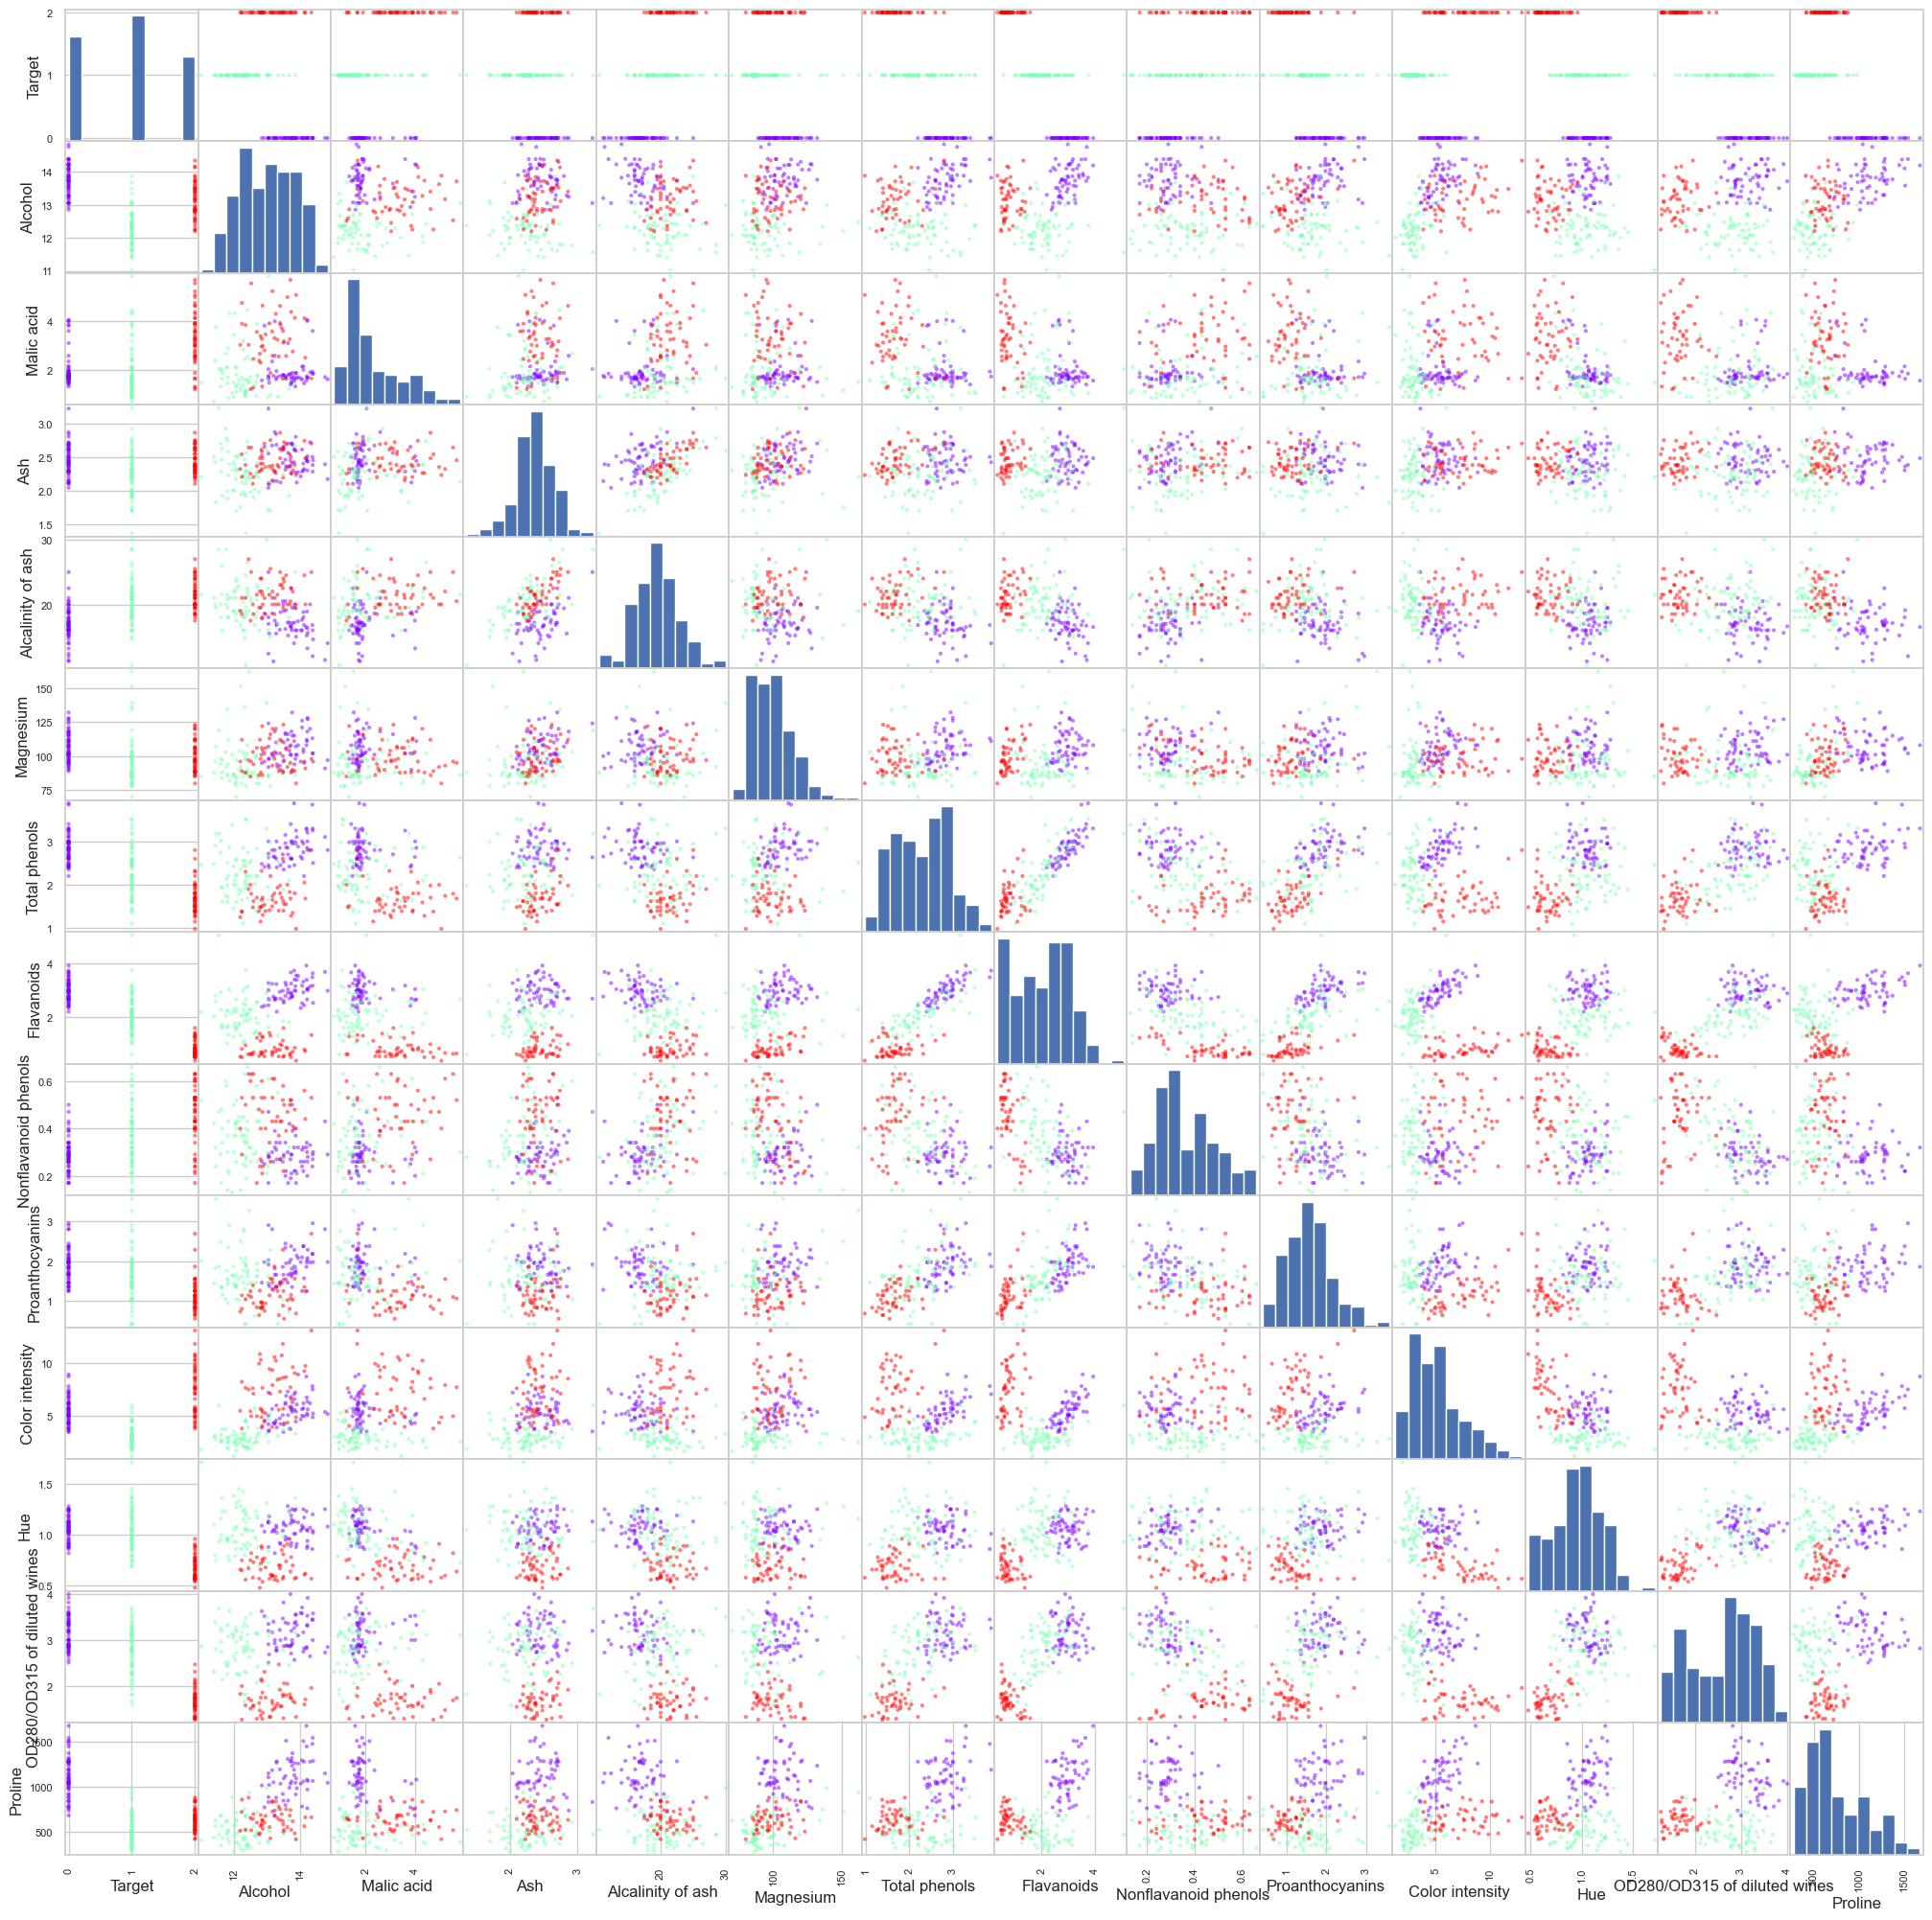

In [387]:
DF['Target'] = DF['Target'].astype('category')
DF['Target'] = DF['Target'].cat.codes
num_categories = len(DF['Target'].unique())
color_map = plt.cm.get_cmap('rainbow', num_categories)

pd.plotting.scatter_matrix(DF, figsize=(25, 25), c=DF['Target'], cmap=color_map)
plt.show()

<Axes: >

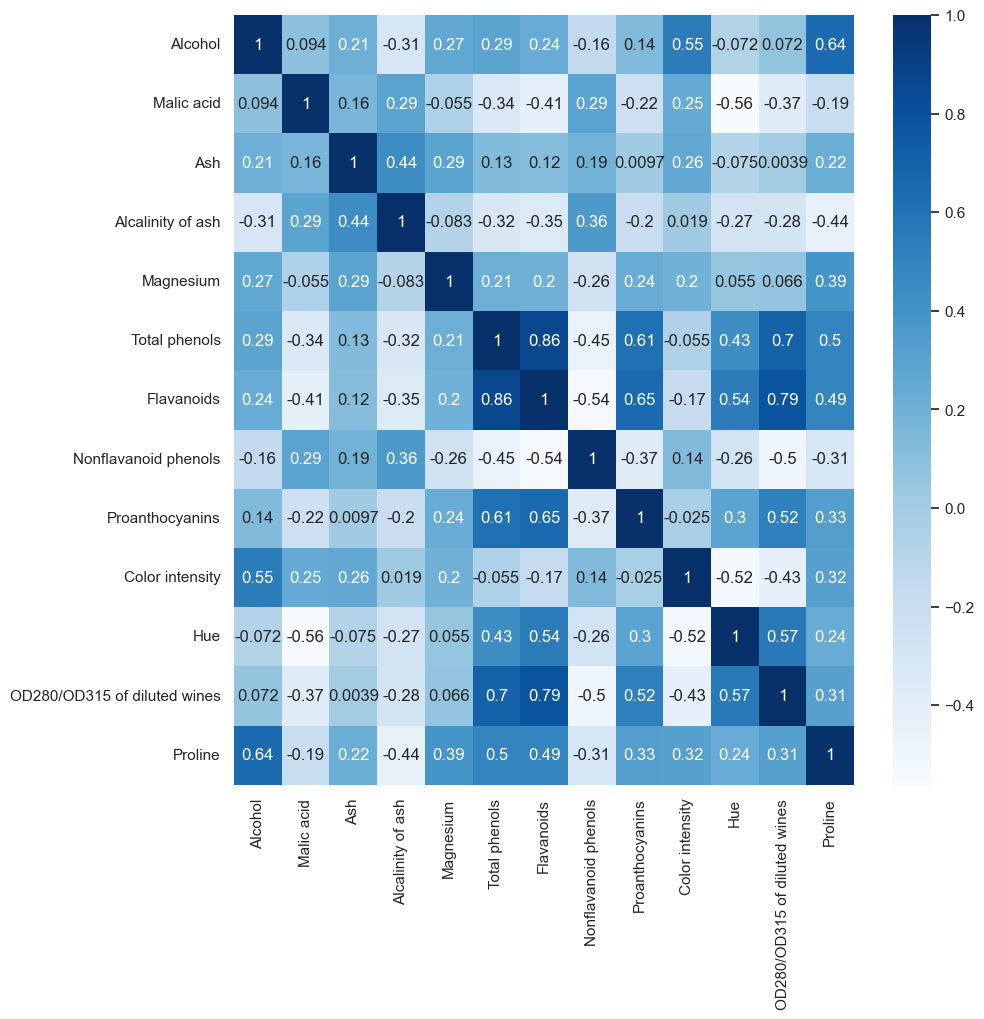

In [388]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),cbar=True,annot=True,cmap='Blues')

Flavanoids and Total phenols have a strong positive relationship with each other and are positively correlated with OD280/OD315 of diluted wines, Hue, Proanthocyanins and Proline making them key statistics.

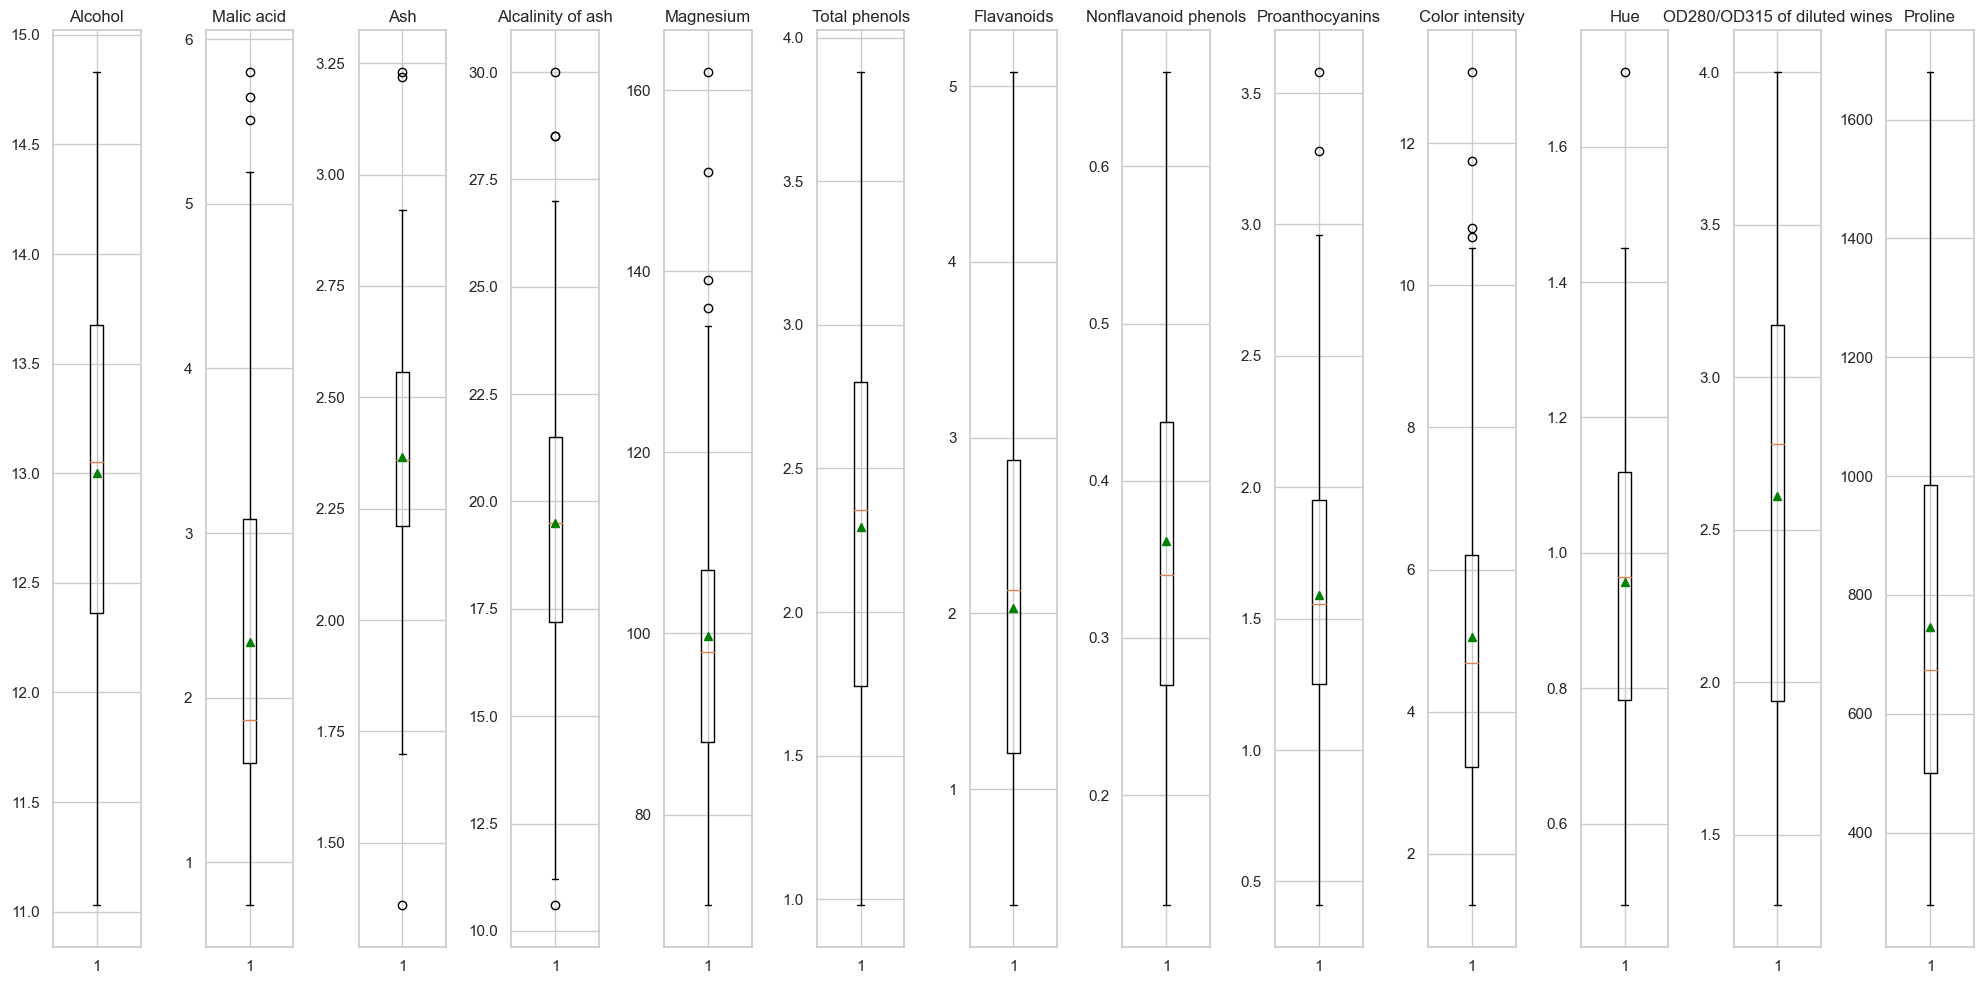

In [389]:
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
fig, axs = plt.subplots(1, len(X.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(X.iloc[:,i], showmeans=True, meanprops=mean_shape)
    ax.set_title(X.columns[i], fontsize=12)
    
plt.tight_layout()

Here is a clear visualisation of all the attributes in boxplots with their means marked in green. I will continue to further break these down into 13 sets of 3 boxplots (13 attributes with 3 boxplots for 3 of the Locations/'Target').

The key conclusions from the following Boxplots will be listed here:
* If Proline is over 985 then it must be Location 1, if under 575 then it is Highly likely to be Location 2
* If Malic acid is over 2.5 then it is Highly likely to be 3
* If Alcohol is under 12.5 then it is likely to be 2
* If Color intensity is greater than 7 it is Highly likely to be 3
* If Hue is below 0.8 it is likely 3
* If OD280/OD315 of diluted wines is below 2 its likely 3
* Flavanoids and total phenol are good indicators due to the interquartile ranges being more seperate between Locations than some of the other attributes like Ash

Comments on these Boxplots:
* Malic acid has a large amount of outliers possibly occuring due to error of measurement
* Magnesium also has a large amount of outliers possibly occuring due to error of measurement
* Proanthocyanins also has a large amount of outliers possibly occuring due to error of measurement

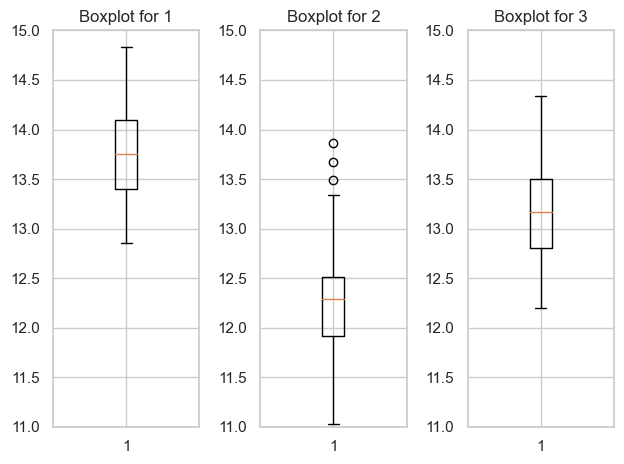

In [390]:
A = DF[DF['Target'] == 0]['Alcohol']
B = DF[DF['Target'] == 1]['Alcohol']
C = DF[DF['Target'] == 2]['Alcohol']

plt.subplot(1, 3, 1)

plt.ylim(11, 15)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(11, 15)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(11, 15)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

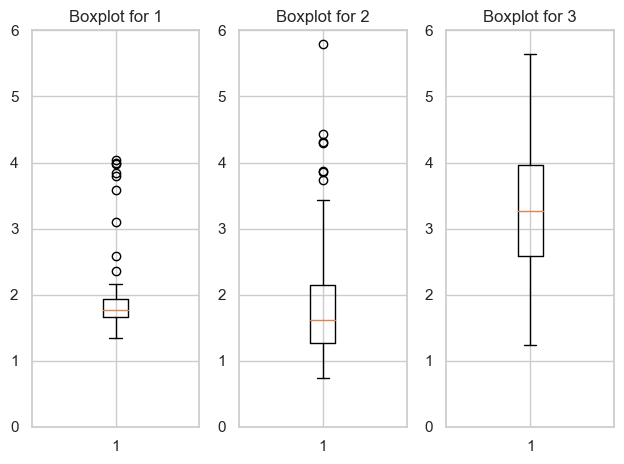

In [391]:
A = DF[DF['Target'] == 0]['Malic acid']
B = DF[DF['Target'] == 1]['Malic acid']
C = DF[DF['Target'] == 2]['Malic acid']

plt.subplot(1, 3, 1)

plt.ylim(0, 6)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0, 6)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0, 6)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

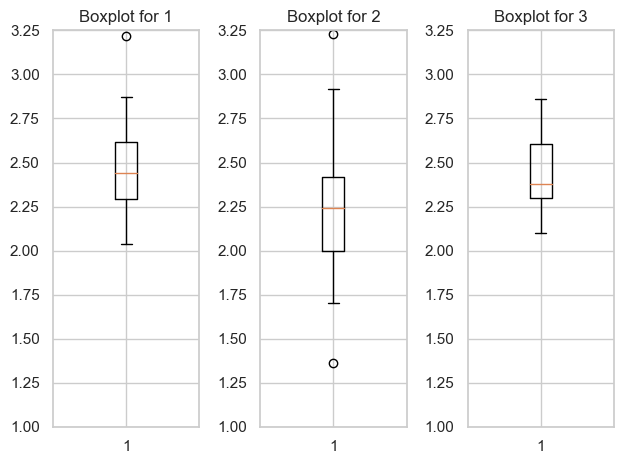

In [392]:
A = DF[DF['Target'] == 0]['Ash']
B = DF[DF['Target'] == 1]['Ash']
C = DF[DF['Target'] == 2]['Ash']

plt.subplot(1, 3, 1)

plt.ylim(1, 3.25)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(1, 3.25)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(1, 3.25)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

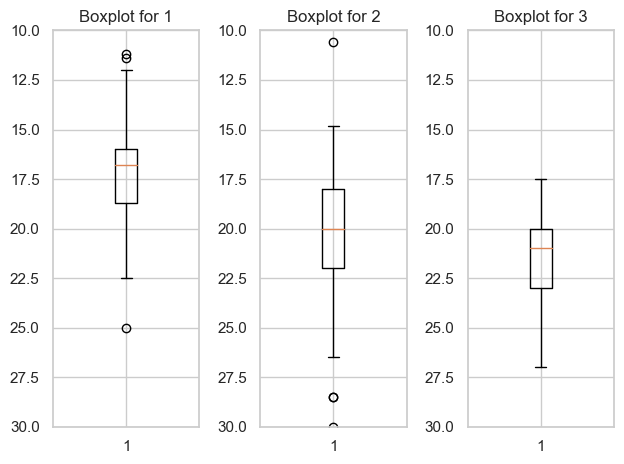

In [393]:
A = DF[DF['Target'] == 0]['Alcalinity of ash']
B = DF[DF['Target'] == 1]['Alcalinity of ash']
C = DF[DF['Target'] == 2]['Alcalinity of ash']

plt.subplot(1, 3, 1)

plt.ylim(30, 10)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(30, 10)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(30, 10)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

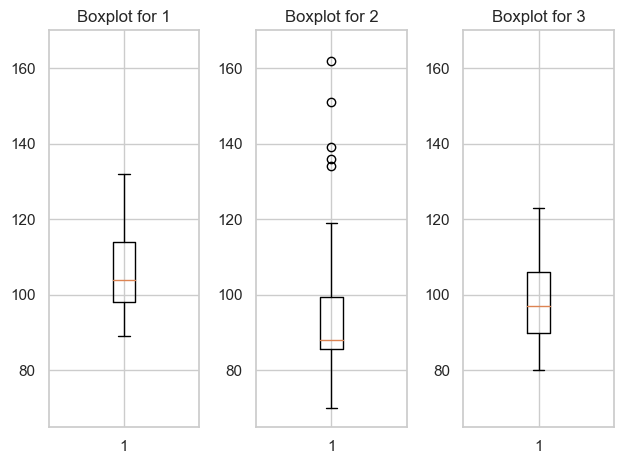

In [394]:
A = DF[DF['Target'] == 0]['Magnesium']
B = DF[DF['Target'] == 1]['Magnesium']
C = DF[DF['Target'] == 2]['Magnesium']

plt.subplot(1, 3, 1)

plt.ylim(65, 170)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(65, 170)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(65, 170)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

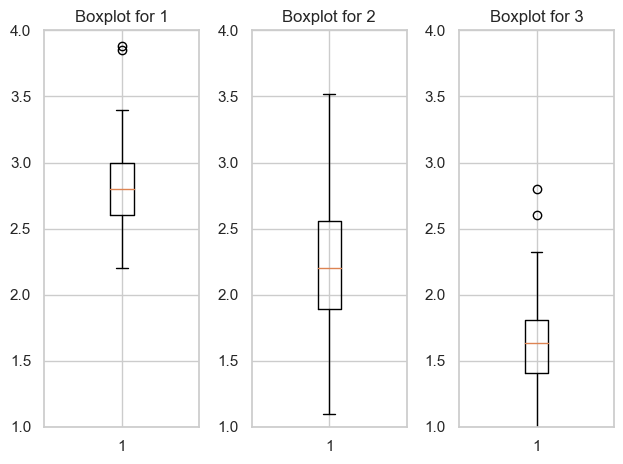

In [395]:
A = DF[DF['Target'] == 0]['Total phenols']
B = DF[DF['Target'] == 1]['Total phenols']
C = DF[DF['Target'] == 2]['Total phenols']

plt.subplot(1, 3, 1)
plt.ylim(1, 4)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(1, 4)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(1, 4)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

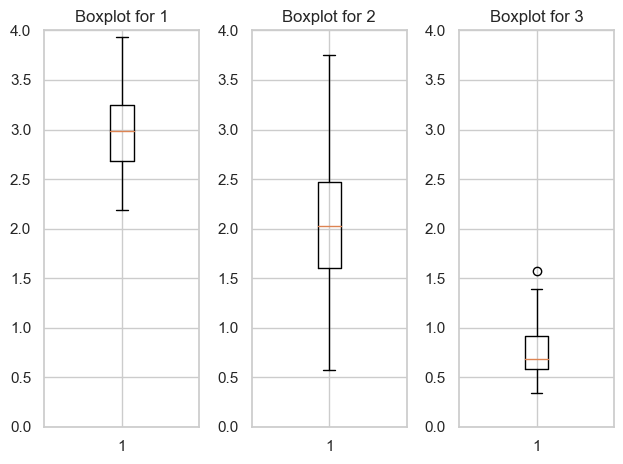

In [396]:
A = DF[DF['Target'] == 0]['Flavanoids']
B = DF[DF['Target'] == 1]['Flavanoids']
C = DF[DF['Target'] == 2]['Flavanoids']

plt.subplot(1, 3, 1)
plt.ylim(0, 4)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0, 4)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0, 4)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

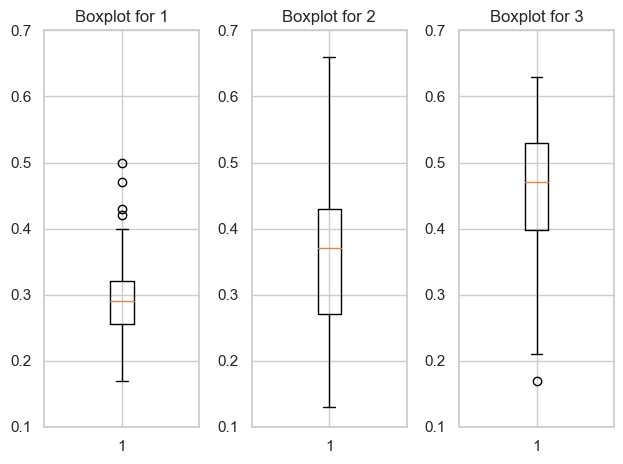

In [397]:
A = DF[DF['Target'] == 0]['Nonflavanoid phenols']
B = DF[DF['Target'] == 1]['Nonflavanoid phenols']
C = DF[DF['Target'] == 2]['Nonflavanoid phenols']

plt.subplot(1, 3, 1)
plt.ylim(0.1, 0.7)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0.1, 0.7)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0.1, 0.7)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

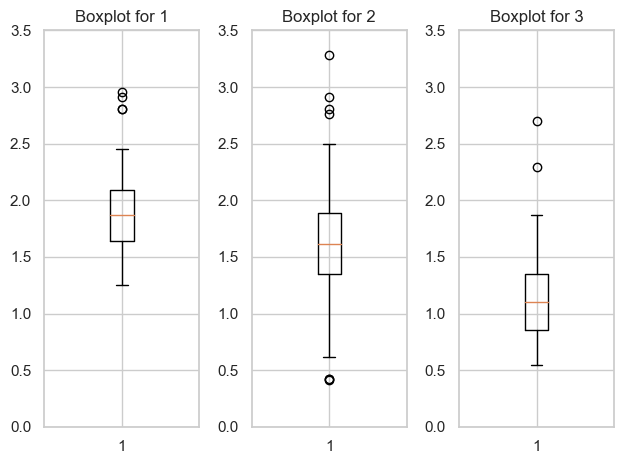

In [398]:
A = DF[DF['Target'] == 0]['Proanthocyanins']
B = DF[DF['Target'] == 1]['Proanthocyanins']
C = DF[DF['Target'] == 2]['Proanthocyanins']

plt.subplot(1, 3, 1)
plt.ylim(0, 3.5)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0, 3.5)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0, 3.5)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

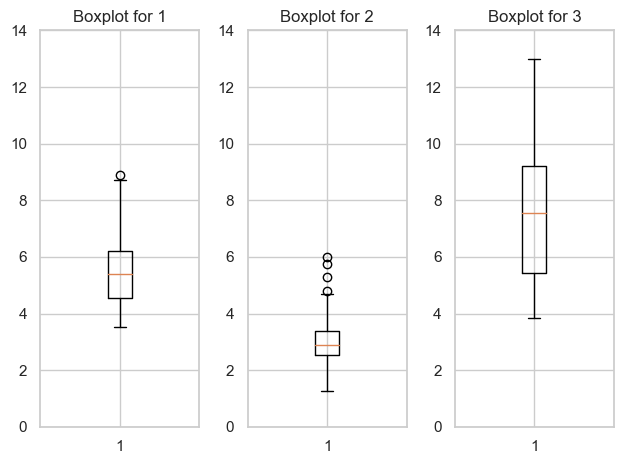

In [399]:
A = DF[DF['Target'] == 0]['Color intensity']
B = DF[DF['Target'] == 1]['Color intensity']
C = DF[DF['Target'] == 2]['Color intensity']

plt.subplot(1, 3, 1)
plt.ylim(0, 14)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0, 14)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0, 14)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

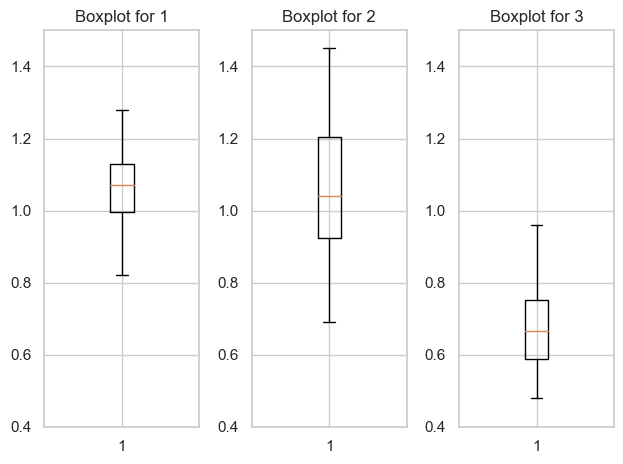

In [400]:
A = DF[DF['Target'] == 0]['Hue']
B = DF[DF['Target'] == 1]['Hue']
C = DF[DF['Target'] == 2]['Hue']

plt.subplot(1, 3, 1)
plt.ylim(0.4, 1.5)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0.4, 1.5)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0.4, 1.5)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

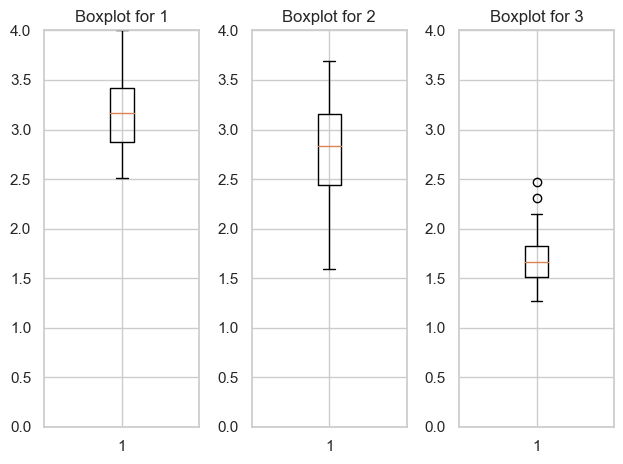

In [401]:
A = DF[DF['Target'] == 0]['OD280/OD315 of diluted wines']
B = DF[DF['Target'] == 1]['OD280/OD315 of diluted wines']
C = DF[DF['Target'] == 2]['OD280/OD315 of diluted wines']

plt.subplot(1, 3, 1)
plt.ylim(0, 4)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0, 4)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0, 4)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

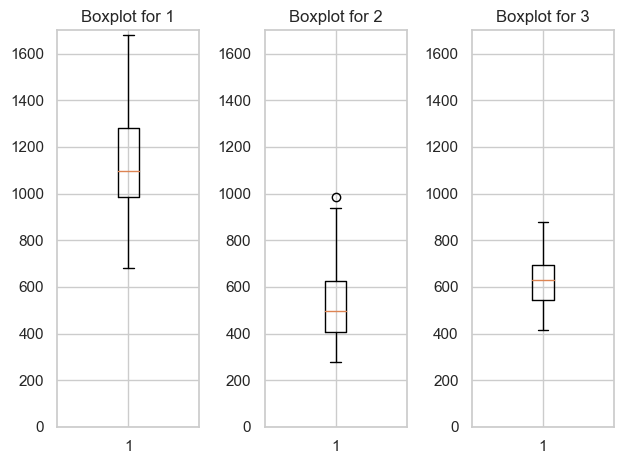

In [402]:
A = DF[DF['Target'] == 0]['Proline']
B = DF[DF['Target'] == 1]['Proline']
C = DF[DF['Target'] == 2]['Proline']

plt.subplot(1, 3, 1)
plt.ylim(0, 1700)
plt.boxplot(A.values)
plt.title('Boxplot for 1')

plt.subplot(1, 3, 2)
plt.ylim(0, 1700)
plt.boxplot(B.values)
plt.title('Boxplot for 2')

plt.subplot(1, 3, 3)
plt.ylim(0, 1700)
plt.boxplot(C.values)
plt.title('Boxplot for 3')

plt.tight_layout()
plt.show()

<h1>Building the model</h1>

I will first apply a decision tree classification algorithm critique the result then apply a K-means clustering algorithm and critique it.

In [413]:
from sklearn.model_selection import train_test_split
# train-test split: 80/20
# split the data into train-test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [414]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, Y_train)
# visualise the tree by printing the string returned by the model's export_tree print method.
print(tree.export_text(dt_clf))

|--- feature_9 <= 3.82
|   |--- feature_11 <= 3.73
|   |   |--- feature_12 <= 1002.50
|   |   |   |--- class: 2
|   |   |--- feature_12 >  1002.50
|   |   |   |--- class: 1
|   |--- feature_11 >  3.73
|   |   |--- class: 1
|--- feature_9 >  3.82
|   |--- feature_6 <= 1.40
|   |   |--- class: 3
|   |--- feature_6 >  1.40
|   |   |--- feature_12 <= 724.50
|   |   |   |--- feature_10 <= 0.83
|   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.83
|   |   |   |   |--- class: 2
|   |   |--- feature_12 >  724.50
|   |   |   |--- class: 1



<h1>Disscussion of results</h1>


I will build a confusion matrix to display the predictions and also provide a accuracy percentage and review

0.9166666666666666

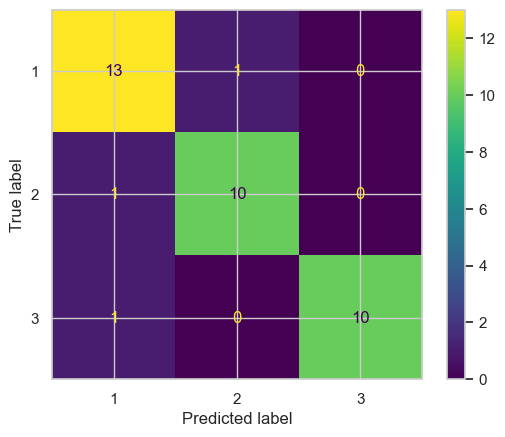

In [415]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
# report confusion matrix and accuracy
predictions = dt_clf.predict(X_test)
predictions
cm = confusion_matrix(Y_test[::], predictions)
# visualise the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
# the accuracy on the testing set
accuracy_score(Y_test[::], predictions)

The accuracy of this model is 0.9444 or 94% on the test data as such I propose that this is very reliable and the confusion matrix is a good visualisation of this. I will futher produce a prediction of the training data to test if the data is overfitted or underfitted. 

1.0

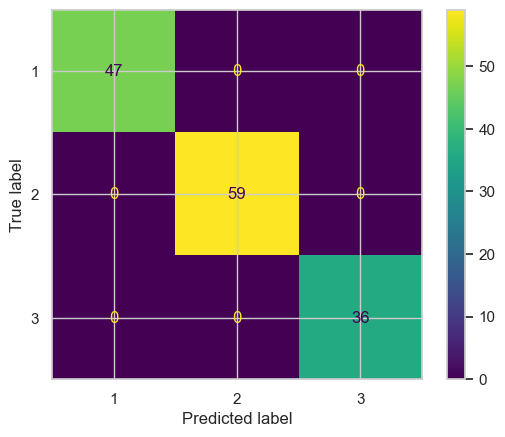

In [406]:
# report confusion matrix and accuracy
predictions = dt_clf.predict(X_train)
predictions
cm = confusion_matrix(Y_train[::], predictions)
# visualise the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot()
# the accuracy on the testing set
accuracy_score(Y_train[::], predictions)

As the difference between the prediction accuracy of the training and test data is only 6% I find it unlikely that it is overfitted and it is not below 70% and so is not underfitted either.

<h1>Build the Model</h1>

I will be creating a PCA enhanced Linear Regression model

In [407]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# train-test split: 80/20
# Split the data into train-test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

pca_model = PCA(0.95)
pca_model.fit(X_train)

X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

regression_model = LinearRegression()

regression_model.fit(X_train_pca, Y_train)

LinearRegression()

<h1>Disscussion of results</h1>

In [408]:
score = regression_model.score(X_test_pca, Y_test)
print("Model R-squared score on test set:", score)

Model R-squared score on test set: 0.8534746139179151


The PCA enhanced Linear Regression model is 0.829 or 83% accurate and as such is a very good model to predict the Location of the data. Linear Regression is not the best for the data though as it is sensitive to outliers and noise, prone to overfitting and underfitting. I will futher produce a prediction of the training data to test if the data is overfitted or underfitted. 

In [409]:
score = regression_model.score(X_train_pca, Y_train)
print("Model R-squared score on test set:", score)

Model R-squared score on test set: 0.8910227928746189


As the difference between the prediction accuracy of the training and test data is only 6% I find it unlikely that it is overfitted and it is not below 70% and so is not underfitted either.

<h1>Conclusion</h1>

Overall the K-means algorithm is more accurate than the PCA enhanced Linear Regression by 11% and is more suited to the task. I tried Linear Regression as there was some clustering in the scatter matrix in the exploritory analysis however it did not work as well and has shown K-means to be superior.

In conclusion, using a K-means algorithm to predict whether a wine is from 1 of the 3 locations is both reliable and accurate. This is due to it being the most suited for the problem as my goal is to identify which Location is most likely for each wine and k-means works by having the Target Location be the dependent variable and the compounds are your predictor variables. 

<h1>References</h1>

[1] Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.